**Importing Libraries**



In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Loading Data**

In [136]:
usr = pd.read_csv('/content/drive/My Drive/Colab Notebooks/pd-ds-coh-team1/data/users.txt')
usr.head(2)

,user_id,birth_year,country,city,created_date,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals
0,user_0,1992,ES,Madrid,2018-09-10 18:46:42.843855,0,STANDARD,1.0,1.0,3,0,0
1,user_1,1985,LT,Klaipeda,2018-01-11 18:53:10.531146,1,STANDARD,NaN,NaN,75,0,0


In [0]:
tr1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/pd-ds-coh-team1/data/transactions_1.txt')
tr2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/pd-ds-coh-team1/data/transactions_2.txt')
tr3 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/pd-ds-coh-team1/data/transactions_3.txt')

tr = pd.concat([tr1,tr2,tr3])

In [52]:
tr.head(2)

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date
0,transaction_0,TRANSFER,AED,4.55,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_4368,2018-04-03 03:34:21.784487
1,transaction_1,CARD_PAYMENT,AED,15.50,COMPLETED,FALSE,4111.0,Dubai,ARE,OUTBOUND,user_2355,2019-03-19 06:15:59.537032


In [0]:
dev = pd.read_csv('/content/drive/My Drive/Colab Notebooks/pd-ds-coh-team1/data/devices.txt')

In [138]:
dev.head(2)

,brand,user_id
0,Apple,user_0
1,Apple,user_1


In [0]:
ntf = pd.read_csv('/content/drive/My Drive/Colab Notebooks/pd-ds-coh-team1/data/notifications.txt')

In [202]:
ntf.head()

,reason,channel,status,user_id,created_date
0,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_1252,2018-12-02 17:58:33.320645
1,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_12783,2018-12-01 23:09:37.367127
2,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_10244,2018-12-04 02:57:56.425660
3,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_14486,2018-12-14 17:09:58.900808
4,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_28,2018-12-11 12:42:59.718574


In [0]:
usr = pd.merge(left=usr, right=dev, how='left', left_on='user_id', right_on='user_id')

In [141]:
usr['brand'].value_counts()

Android    7800
Apple      7712
Unknown      32
Name: brand, dtype: int64

In [143]:
import random

def unknown_brand(brand):
  if brand=='Unknown':
    return random.sample(['Android','Apple'],1)[0]
  else:
    return brand

usr['brand'] = usr ['brand'].apply(unknown_brand)
usr['brand'].value_counts()

Android    7818
Apple      7726
Name: brand, dtype: int64

In [0]:
devices ={'Android':0 , 'Apple':1}

usr['brand'] = usr['brand'].map(devices)

In [146]:
usr.brand.value_counts()

0    7818
1    7726
Name: brand, dtype: int64

In [0]:
grouping = {'GB':'western_europe' , 'FR':'western_europe' , 'IE':'western_europe' , 'DE':'western_europe' , 'CH':'western_europe' , 'NL':'western_europe' ,
            'BE':'western_europe' , 'AT':'western_europe' , 'JE':'western_europe' , 'GG':'western_europe' , 'IM':'western_europe',
           'PL':'central_eastern_europe' , 'RO':'central_eastern_europe' , 'CZ':'central_eastern_europe' , 'HU':'central_eastern_europe' , 'BG':'central_eastern_europe' ,
           'SI':'central_eastern_europe' , 'SK':'central_eastern_europe' , 'HR':'central_eastern_europe' , 'LU':'central_eastern_europe' , 'LI':'central_eastern_europe' ,
           'ES' : 'southern_europe', 'PT': 'southern_europe', 'MT': 'southern_europe', 'IT': 'southern_europe', 'GR': 'southern_europe', 'CY': 'southern_europe', 
           'GI': 'southern_europe','LT' : 'northern_europe', 'LV': 'northern_europe', 'SE': 'northern_europe', 'DK': 'northern_europe', 
           'NO': 'northern_europe', 'FI' : 'northern_europe','EE': 'northern_europe','IS': 'northern_europe', 'GP':'not_europe' ,
           'RE':'not_europe','AU':'not_europe' , 'MQ':'not_europe' }

usr['country'] = usr['country'].replace(grouping)

In [148]:
usr['country'].value_counts()

western_europe            8796
central_eastern_europe    3407
southern_europe           2320
northern_europe            998
not_europe                  23
Name: country, dtype: int64

In [149]:
def not_europe(country):
  if country=='not_europe':
    return random.sample(['western_europe','central_eastern_europe','southern_europe','northern_europe'],1)[0]
  else :
   return country

usr['country'] = usr['country'].apply(not_europe)
usr['country'].value_counts()

western_europe            8801
central_eastern_europe    3415
southern_europe           2324
northern_europe           1004
Name: country, dtype: int64

In [150]:
categories_country = {'northern_europe ','southern_europe','central_eastern_europe','western_europe'}
for i in categories_country:
  usr[i] = np.where(usr['country']==i,1,0)
usr.head(2)

,user_id,birth_year,country,city,created_date,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals,brand,southern_europe,western_europe,northern_europe,central_eastern_europe
0,user_0,1992,southern_europe,Madrid,2018-09-10 18:46:42.843855,0,STANDARD,1.0,1.0,3,0,0,1,1,0,0,0
1,user_1,1985,northern_europe,Klaipeda,2018-01-11 18:53:10.531146,1,STANDARD,NaN,NaN,75,0,0,1,0,0,0,0


In [151]:
paid = {'STANDARD':0,'SILVER':1,'GOLD':1}
usr['plan'] =usr['plan'].map(paid)
usr['plan'].value_counts()

0    14394
1     1150
Name: plan, dtype: int64

In [0]:
import datetime
now = datetime.datetime.now()

usr['age'] = now.year -usr['birth_year']

In [89]:
usr.head(1)

,user_id,birth_year,country,city,created_date,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals,brand_x,age,southern_europe,western_europe,northern_europe,central_eastern_europe
0,user_0,1992,southern_europe,Madrid,2018-09-10 18:46:42.843855,0,0,1.0,1.0,3,0,0,1,28,1,0,0,0


**NaN**

In [0]:
mask = usr['attributes_notifications_marketing_push'].isna()
ind = usr['attributes_notifications_marketing_push'].loc[mask].sample(frac=0.94).index
usr.loc[ind,'attributes_notifications_marketing_push'] = 1
usr['attributes_notifications_marketing_push']= usr['attributes_notifications_marketing_push'].fillna(0)

In [0]:
mask = usr['attributes_notifications_marketing_email'].isna()
ind = usr['attributes_notifications_marketing_email'].loc[mask].sample(frac=0.94).index
usr.loc[ind,'attributes_notifications_marketing_email'] = 1
usr['attributes_notifications_marketing_email']= usr['attributes_notifications_marketing_email'].fillna(0)

**Preparing data for training**

In [0]:
copy = usr.copy()
copy.drop(['user_id','birth_year','country','city','created_date','num_referrals','num_successful_referrals'],axis=1,inplace=True)
copy.head()

X = copy.drop('plan',axis=1)
y = copy['plan']

In [0]:
copy.to_csv('classification-table.txt')

In [0]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

**LogisticRegression**

In [183]:
from sklearn.linear_model import LogisticRegression

sc = StandardScaler()
var = VarianceThreshold()
smp = SMOTE()
mdl = LogisticRegression()

pipe = Pipeline ([('scaler',sc),
                  ('selector',var),
                  ('sampler',smp),
                  ('model',mdl)])


grid = {'model__penalty': ['l1','l2'],
          'model__C':[0.0,0.5,1.0,2.0]}

clf= GridSearchCV(pipe,grid,cv=5)
clf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters 

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('selector',
                                        VarianceThreshold(threshold=0.0)),
                                       ('sampler',
                                        SMOTE(k_neighbors=5, kind='deprecated',
                                              m_neighbors='deprecated',
                                              n_jobs=1, out_step='deprecated',
                                              random_state=None, ratio=None,
                                              sampling_strategy='auto',
                                              svm_est...
                                             

In [184]:
from sklearn.metrics import classification_report
print(clf.best_params_, '\n')

print(classification_report(y_test, clf.predict(X_test)))

{'model__C': 2.0, 'model__penalty': 'l2'} 

              precision    recall  f1-score   support

           0       0.96      0.78      0.86      2863
           1       0.19      0.61      0.29       246

    accuracy                           0.77      3109
   macro avg       0.58      0.69      0.58      3109
weighted avg       0.90      0.77      0.82      3109



[[2236   97]
 [ 627  149]]


Text(48.5, 0.5, 'Actual classes')

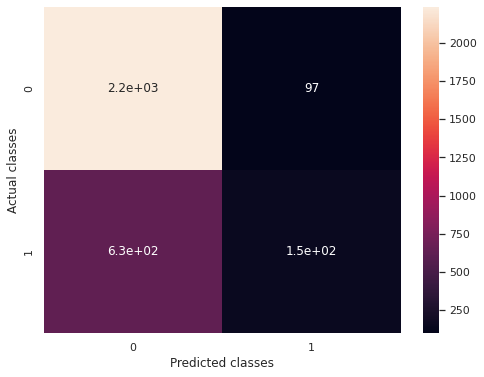

In [185]:
from sklearn.metrics import confusion_matrix
sns.set(rc={'figure.figsize':(8,6)})
cfm = confusion_matrix(clf.predict(X_test), y_test.values)
sns.heatmap(cfm, annot=True)
print(cfm)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

**Support Vector Machine**

In [200]:
from sklearn import svm


sc = StandardScaler()
var = VarianceThreshold()
smp = SMOTE()
mdl = svm.SVC()

pipe = Pipeline ([('scaler',sc),
                  ('selector',var),
                  ('sampler',smp),
                  ('model',mdl)])


grid = {}

clf= GridSearchCV(pipe,grid,cv=3)
clf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('selector',
                                        VarianceThreshold(threshold=0.0)),
                                       ('sampler',
                                        SMOTE(k_neighbors=5, kind='deprecated',
                                              m_neighbors='deprecated',
                                              n_jobs=1, out_step='deprecated',
                                              random_state=None, ratio=None,
                                              sampling_strategy='auto',
                                              svm_est...
                                        SVC(C

In [203]:

print(clf.best_params_, '\n')

print(classification_report(y_test, clf.predict(X_test)))

{} 

              precision    recall  f1-score   support

           0       0.96      0.79      0.87      2863
           1       0.19      0.57      0.29       246

    accuracy                           0.78      3109
   macro avg       0.57      0.68      0.58      3109
weighted avg       0.90      0.78      0.82      3109



[[2274  106]
 [ 589  140]]


Text(48.5, 0.5, 'Actual classes')

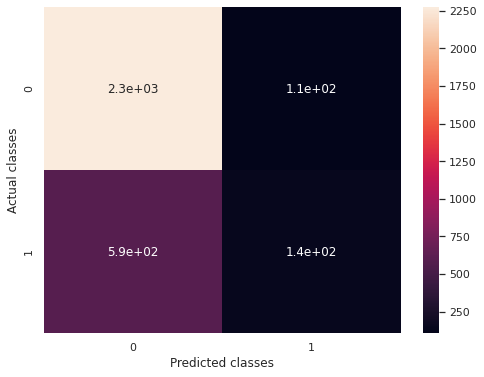

In [204]:
sns.set(rc={'figure.figsize':(8,6)})
cfm = confusion_matrix(clf.predict(X_test), y_test.values)
sns.heatmap(cfm, annot=True)
print(cfm)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')